      age     bmi  children      charges  smoke  area  gender
0      19  27.900         0  16884.92400      1     0       0
1      18  33.770         1   1725.55230      0     0       1
2      28  33.000         3   4449.46200      0     0       1
3      33  22.705         0  21984.47061      0     1       1
4      32  28.880         0   3866.85520      0     1       1
...   ...     ...       ...          ...    ...   ...     ...
1333   50  30.970         3  10600.54830      0     1       1
1334   18  31.920         0   2205.98080      0     0       0
1335   18  36.850         0   1629.83350      0     0       0
1336   21  25.800         0   2007.94500      0     0       0
1337   61  29.070         0  29141.36030      1     1       0

[1338 rows x 7 columns]
smoke vs charges


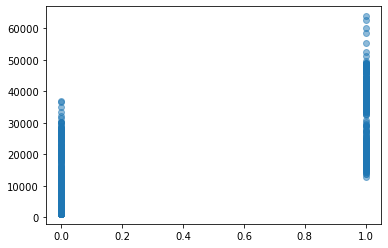

bmi vs charges


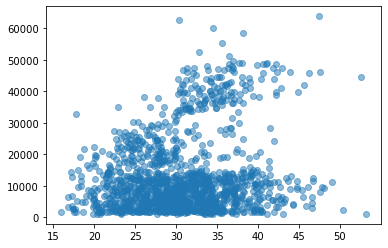

age vs charges


children vs charges


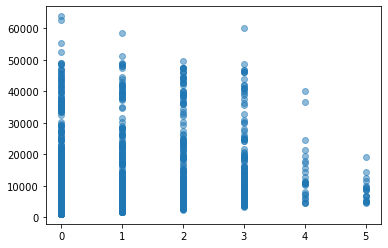

checking corelation between feautures
               age       bmi  children   charges     smoke      area    gender
age       1.000000  0.109272  0.042469  0.299008 -0.025019 -0.000407 -0.020856
bmi       0.109272  1.000000  0.012759  0.198341  0.003750 -0.135996  0.046371
children  0.042469  0.012759  1.000000  0.067998  0.007673  0.024806  0.017163
charges   0.299008  0.198341  0.067998  1.000000  0.787251 -0.039905  0.057292
smoke    -0.025019  0.003750  0.007673  0.787251  1.000000 -0.036945  0.076185
area     -0.000407 -0.135996  0.024806 -0.039905 -0.036945  1.000000 -0.011156
gender   -0.020856  0.046371  0.017163  0.057292  0.076185 -0.011156  1.000000


In [1]:
import numpy as np 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
import xgboost
import os

data = pd.read_csv("insurance.csv") 
#print (data)

# Obesity=[]
# # def BmiToBinaryData(data):
# #     for row in data["bmi"]:
# #         if(row > 30):
# #             Obesity.append(1)
# #         else:
# #             Obesity.append(0)
# #     return Obesity

smoke=[]
def SmokerToBinaryData(data):
    for row in data["smoker"]:
        if(row=="yes"):
            smoke.append(1)
        else:
            smoke.append(0)
    return smoke

area=[]
def RegionToBinaryData(data):
    for row in data["region"]:
        if(row=="northwest"):
            area.append(1)
        else:
            area.append(0)
    return area   

gender=[]
def GenderToBinaryData(data):
    for row in data["sex"]:
        if(row=="male"):
            gender.append(1)
        else:
            gender.append(0)
    return gender


# data["obese"]=BmiToBinaryData(data)
# data = data.drop('bmi', 1)
data["smoke"]=SmokerToBinaryData(data)
data = data.drop('smoker', 1)
data["area"]=RegionToBinaryData(data)
data = data.drop('region', 1)
data["gender"]=GenderToBinaryData(data)
data = data.drop('sex', 1)
print(data)

y=data["charges"]
for x in ["smoke","bmi","age","children"]:
    print (x + " vs " + "charges")
    plt.scatter(data[x],y , alpha=0.5)
    plt.show()

print ("checking corelation between feautures")
print(data.corr())    

data = data.drop('area', 1)
data = data.drop('gender', 1)
# data = data.drop('children', 1)
# print(data)

x = data.drop('charges',1)
# print(x)
y = data["charges"]
# print(y)

In [2]:
acc=[0,0,0,0,0,0,0,0]

for i in range(0,10):
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y ,test_size=0.2)
    
    from sklearn import neighbors
    kn= neighbors.KNeighborsRegressor(n_neighbors =2)
    kn.fit(x_train, y_train)  #fit the model
    # pred=kn.predict(x_test) #make prediction on test set
    # print(pred)
    acc[0]+=kn.score(x_test,y_test)
#     print("KNeighbors Regressor Prediction Score - " + str(kn.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((kn.predict(x_test) - y_test) ** 2)))

    # #使用gridsearch找最佳k值
    # from sklearn.model_selection import GridSearchCV
    # params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    # knn = neighbors.KNeighborsRegressor()
    # kn = GridSearchCV(knn, params, cv=5)
    # kn.fit(x_train,y_train)
    # kn.best_params_

    from sklearn.linear_model import LinearRegression
    lin = linear_model.LinearRegression() 
    lin.fit(x_train, y_train)
    # regr.predict(x_test)
    acc[1]+=lin.score(x_test,y_test)
#     print("Linear Regression Prediction Score - " + str(lin.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((lin.predict(x_test) - y_test) ** 2)))

    # reg = linear_model.BayesianRidge()
    # reg.fit(x_train, y_train)
    # # reg.predict(x_test)
    # print("Linear Regression bayesian_ridge Prediction Score - " + str(reg.score(x_test,y_test)))
    # print("RMSE: %.2f" % math.sqrt(np.mean((reg.predict(x_test) - y_test) ** 2)))

    from sklearn import tree
    tre= tree.DecisionTreeRegressor()
    tre.fit(x_train,y_train)
    acc[2]+=tre.score(x_test,y_test)
#     print("tree Regression Prediction Score - " + str(tre.score(x_test,y_test)))
#     print("RMSE: %.2f"  % math.sqrt(np.mean((tree.predict(x_test) - y_test) ** 2)))

    # from sklearn import svm
    # svm = svm.SVR()
    # svm.fit(x_train,y_train)
    # print("svm Regression Prediction Score - " + str(svm.score(x_test,y_test)))
    # print("RMSE: %.2f"  % math.sqrt(np.mean((svm.predict(x_test) - y_test) ** 2)))

    # 随机森林回归
    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=194)
    rfr.fit(x_train, y_train)
    acc[3]+=rfr.score(x_test,y_test)
#     print("RandomForest Regressor Prediction Score - " + str(rfr.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((rfr.predict(x_test) - y_test) ** 2)))
    
    # AdaBoost:自适应增强。使用的是指数损失,使偏导为零让损失函数达最小
    from sklearn.ensemble import AdaBoostRegressor
    regressor=AdaBoostRegressor(n_estimators=10,learning_rate=0.05)
    regressor.fit(x_train,y_train)
    acc[4]+=regressor.score(x_test,y_test)
#     print("AdaBoost Regression Prediction Score - " + str(regressor.score(x_test,y_test)))
#     print("RMSE: %.2f"  % math.sqrt(np.mean((regressor.predict(x_test) - y_test) ** 2)))

    # #使用gridsearch找最佳k值
    # from sklearn.model_selection import GridSearchCV
    # params = {'n_estimators':[30,50,75,100,125,150,175,200],'learning_rate':[0.08]}
    # adaboost=AdaBoostRegressor()
    # kn = GridSearchCV(adaboost, params, cv=5)
    # kn.fit(x_train,y_train)
    # kn.best_params_

    # #GBDT：梯度提升决策树:使用了梯度下降算法
    from sklearn.ensemble import GradientBoostingRegressor
    gbdt = GradientBoostingRegressor(n_estimators=70, learning_rate=0.08,max_depth=3, random_state=0, loss='ls')
    gbdt.fit(x_train, y_train)
    acc[5]+=gbdt.score(x_test,y_test)
#     print("GradientBoosting Regression Prediction Score - " + str(gbdt.score(x_test,y_test)))
#     print("RMSE: %.2f"  % math.sqrt(np.mean((gbdt.predict(x_test) - y_test) ** 2)))

    # xgboost：GBDT的进化，使用了梯度下降算法
    import xgboost
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,max_depth=3)
    # traindf, testdf = train_test_split(x_train, test_size = 0.3)
    xgb.fit(x_train,y_train)
    # xgb.predict(x_test)
    acc[6]+=xgb.score(x_test,y_test)
#     print("xgboost Regression Prediction Score - " + str(xgb.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((xgb.predict(x_test) - y_test) ** 2)))

    # GBDT模型的另一个进化版本：LightGBM,在模型的训练速度和内存方面的优化
    import lightgbm as lgb
    gbm = lgb.LGBMRegressor(objective='regression', num_leaves=8, learning_rate=0.09, n_estimators=49)
    gbm.fit(x_train,y_train)
    acc[7]+=gbm.score(x_test,y_test)
#     print("lightgbm Regression Prediction Score - " + str(gbm.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((gbm.predict(x_test) - y_test) ** 2)))

    # from sklearn.neural_network import MLPRegressor
    # mlp = MLPRegressor(
    # hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    # learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    # random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    # early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    # mlp.fit(x_train, y_train) 
    # print("MLPClassifier Regressor Prediction Score - " + str(mlp.score(x_test,y_test)))
#     print("RMSE: %.2f" % math.sqrt(np.mean((mlp.predict(x_test) - y_test) ** 2)))

print("KNeighbors Regressor Prediction Score - " + str(acc[0]/10))
print("Linear Regression Prediction Score - " + str(acc[1]/10))
print("tree Regression Prediction Score - " + str(acc[2]/10))
print("RandomForest Regressor Prediction Score - " + str(acc[3]/10))
print("AdaBoost Regression Prediction Score - " + str(acc[4]/10))
print("GradientBoosting Regression Prediction Score - " + str(acc[5]/10))
print("xgboost Regression Prediction Score - " + str(acc[6]/10))
print("lightgbm Regression Prediction Score - " + str(acc[7]/10))

# d = {'age': [31], 'obese': [1], 'smoke':[1]}
# df = pd.DataFrame(data=d)
# print (df)
# print("predcit insurance premium cost - ")
# print(xgb.predict(df))

KNeighbors Regressor Prediction Score - 0.41945204962985416
Linear Regression Prediction Score - 0.7978274606303825
tree Regression Prediction Score - 0.728759238137912
RandomForest Regressor Prediction Score - 0.8664391590599289
AdaBoost Regression Prediction Score - 0.8834221674774081
GradientBoosting Regression Prediction Score - 0.8991577340718944
xgboost Regression Prediction Score - 0.8995490084195923
lightgbm Regression Prediction Score - 0.9047038607389444
